##  Setting-up The Environment


In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2 
from tqdm import tqdm 
import warnings 
warnings.filterwarnings("ignore")


In [3]:
import os

train_path = "/kaggle/input/waste-classification-data/DATASET/TRAIN"
test_path = "/kaggle/input/waste-classification-data/DATASET/TEST"

# Check if the paths exist
train_exists = os.path.exists(train_path)
test_exists = os.path.exists(test_path)

print("Train path exists:", train_exists)
print("Test path exists:", test_exists)


Train path exists: True
Test path exists: True


## Preprocessing 

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D , Activation , Dense , Flatten , BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator , img_to_array , load_img
from tensorflow.keras.utils import plot_model 
from glob import glob


## visualization 


In [5]:
x_data = []
y_data = []
for category in glob(train_path+"/*"):
    for file in tqdm(glob(category+"/*")):
        img_array = cv2.imread(file)
        img_array = cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB)
        x_data.append(img_array)
        y_data.append(category.split('/')[-1])

data = pd.DataFrame({'image': x_data , "label":y_data})

100%|██████████| 12565/12565 [00:49<00:00, 252.60it/s]


In [6]:
data.shape

(22564, 2)

In [7]:
print(data.columns)
print(type(data))
print(data.info())
print(data.isnull().sum())

Index(['image', 'label'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22564 entries, 0 to 22563
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   image   22564 non-null  object
 1   label   22564 non-null  object
dtypes: object(2)
memory usage: 352.7+ KB
None
image    0
label    0
dtype: int64


In [8]:
data.head(1)

,image,label
0,"[[[95, 69, 36], [97, 71, 38], [101, 75, 42], [...",R


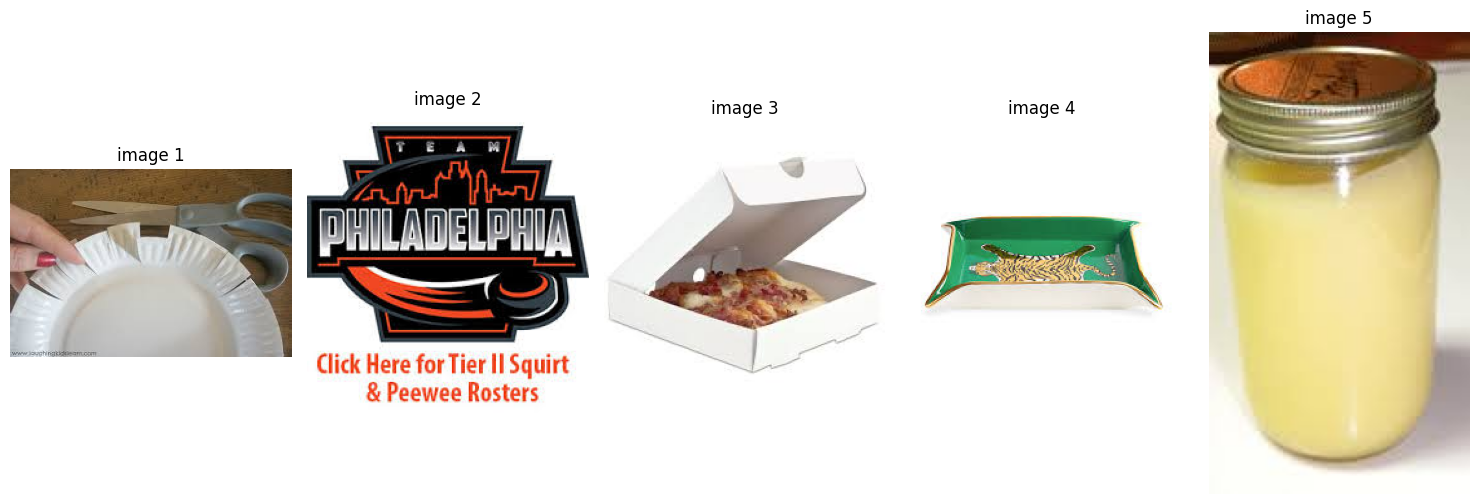

In [9]:
import matplotlib.pyplot as plt 

# Displaying 5 images to inspect dataset
fig , axes = plt.subplots(1,5,figsize=(15,5))
for i, ax in enumerate(axes):
    img = data["image"].iloc[i]
    ax.imshow(img.astype("uint8"))
    ax.axis("off")
    ax.set_title(f"image {i+1}")

plt.tight_layout()
plt.show()

In [11]:
dimensions = data['image'].apply(lambda img: img.shape)
print(dimensions.value_counts())

image
(225, 225, 3)    4240
(183, 275, 3)    2563
(194, 259, 3)    1728
(168, 300, 3)     943
(275, 183, 3)     497
                 ... 
(152, 225, 3)       1
(300, 153, 3)       1
(299, 154, 3)       1
(219, 166, 3)       1
(220, 217, 3)       1
Name: count, Length: 812, dtype: int64


In [13]:
pixel_means = data['image'].apply(lambda img: img.mean())
pixel_stds = data['image'].apply(lambda img: img.std())

print("Mean pixel intensity:", pixel_means.mean())
print("Standard deviation of pixel intensity:", pixel_stds.mean())


Mean pixel intensity: 161.29260501506897
Standard deviation of pixel intensity: 62.64534948371239
